# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

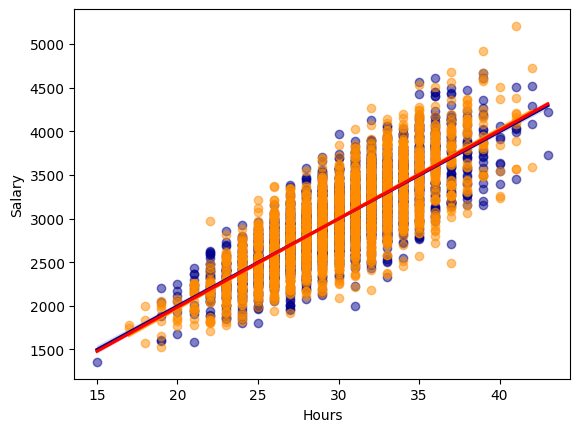

In [3]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [4]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 101.2


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

### Scenario A: Direct Discrimination

The salary of women is reduced by 200 euros


In [5]:
n = 5000

# gender
gen_a = np.random.binomial(1, 0.5, size=n)

# work hours (same for both genders)
hrs_a = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise, but women get 200 euros less
sal_a = hrs_a * np.random.normal(100, 10, size=n)

# Apply direct discrimination: reduce women's salary by 200
sal_a = sal_a - 200 * gen_a

# create data frame
data_a = pd.DataFrame({"Gender": gen_a, "Hours": hrs_a, "Salary": sal_a})

Scenario A slope: 100.7


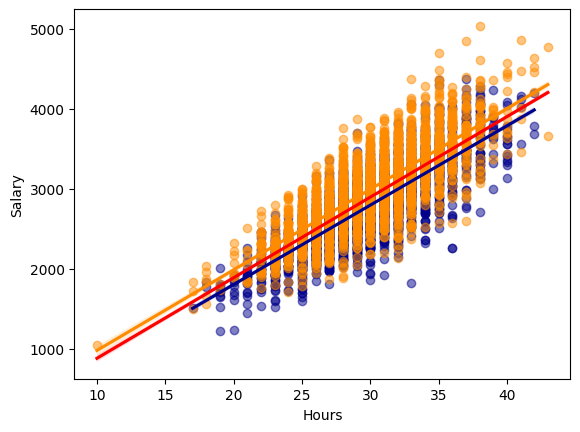

In [6]:
sns.regplot(x="Hours", y="Salary", data=data_a[data_a["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_a[data_a["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_a, marker="None", color="red")

# Regression model for scenario A
reg_a = LinearRegression().fit(hrs_a.reshape(-1,1), sal_a.reshape(-1,1))

print("Scenario A slope: %.1f" % reg_a.coef_[0][0])

### Scenario B: No Discrimination

The working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary


In [7]:
n = 5000

# gender
gen_b = np.random.binomial(1, 0.5, size=n)

# work hours: men (gender=0) have binomial(60, 0.55), women (gender=1) have binomial(60, 0.45)
hrs_b = np.zeros(n)

# hours, men
hrs_b[gen_b == 0] = np.random.binomial(60, 0.55, size=np.sum(gen_b == 0))

# hours, women  
hrs_b[gen_b == 1] = np.random.binomial(60, 0.45, size=np.sum(gen_b == 1))

# salary = 100 * hours + noise (same rate for both genders)
sal_b = hrs_b * np.random.normal(100, 10, size=n)

# create data frame
data_b = pd.DataFrame({"Gender": gen_b, "Hours": hrs_b, "Salary": sal_b})


Scenario B slope: 100.1


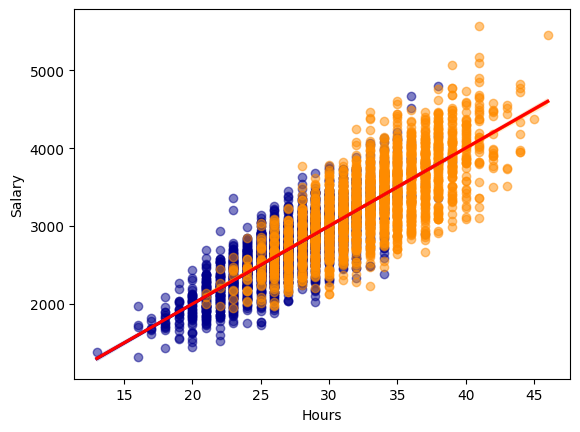

In [8]:
sns.regplot(x="Hours", y="Salary", data=data_b[data_b["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_b[data_b["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_b, marker="None", color="red")

# Regression model
reg_b = LinearRegression().fit(hrs_b.reshape(-1,1), sal_b.reshape(-1,1))

print("Scenario B slope: %.1f" % reg_b.coef_[0][0])


### Scenario C: Indirect Discrimination

Both of the above changes at the same time.

In [9]:
n = 5000

# gender
gen_c = np.random.binomial(1, 0.5, size=n)

# work hours: men (gender=0) have binomial(60, 0.55), women (gender=1) have binomial(60, 0.45)
hrs_c = np.zeros(n)

# hours, men
hrs_c[gen_c == 0] = np.random.binomial(60, 0.55, size=np.sum(gen_c == 0))

# hours, women  
hrs_c[gen_c == 1] = np.random.binomial(60, 0.45, size=np.sum(gen_c == 1))

# salary = 100 * hours + noise, but women also get 200 euros less
sal_c = hrs_c * np.random.normal(100, 10, size=n)
sal_c = sal_c - 200 * gen_c

# create data frame
data_c = pd.DataFrame({"Gender": gen_c, "Hours": hrs_c, "Salary": sal_c})


Scenario C slope: 112.7


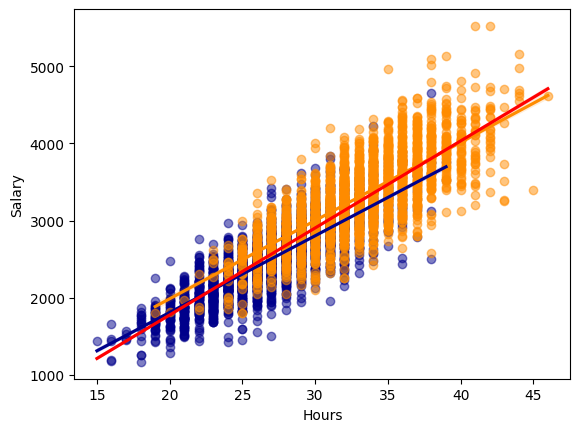

In [10]:
sns.regplot(x="Hours", y="Salary", data=data_c[data_c["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_c[data_c["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_c, marker="None", color="red")

# Regression model
reg_c = LinearRegression().fit(hrs_c.reshape(-1,1), sal_c.reshape(-1,1))

print("Scenario C slope: %.1f" % reg_c.coef_[0][0])


In [11]:
print("Slopes:")
print("Original baseline slope: 99.6")
print(f"Scenario A (Direct discrimination) slope: {reg_a.coef_[0][0]:.1f}")
print(f"Scenario B (No discrimination) slope: {reg_b.coef_[0][0]:.1f}")
print(f"Scenario C (Indirect discrimination) slope: {reg_c.coef_[0][0]:.1f}")

Slopes:
Original baseline slope: 99.6
Scenario A (Direct discrimination) slope: 100.7
Scenario B (No discrimination) slope: 100.1
Scenario C (Indirect discrimination) slope: 112.7


My analysis:

The slope changes significantly for scenario C. This is because the regression model without gender cannot distinguish between the different hour distributions, leading to a biased slope estimate.

To detect indirect discrimination, we need to include the protected characteristic (gender) in our model. This allows us to control for gender effects and see if there are different salary patterns.

### Detecting Indirect Discrimination

In [14]:
# Prepare features: Hours and Gender
X_c = np.column_stack([hrs_c, gen_c])  # [Hours, Gender]
y_c = sal_c

# Fit regression model with both hours AND gender
reg_with_gender = LinearRegression().fit(X_c, y_c)

print("Regression model with gender included:")
print(f"Hours coefficient: {reg_with_gender.coef_[0]:.1f}")
print(f"Gender coefficient: {reg_with_gender.coef_[1]:.1f}")
print(f"Intercept: {reg_with_gender.intercept_:.1f}")


Regression model with gender included:
Hours coefficient: 100.3
Gender coefficient: -197.2
Intercept: -6.8


As apparent, this model can detect both direct discrimination (gender coefficient) and account for different working patterns between genders. The 200 euro difference in salary between men and women is now clearly visible.